# $t$-distributed stochastic neighbor embedding

If you are one of thousands who use $t$-SNE for dimensionality reduction and haven\t read the original paper, you are one lucky guy. Because here you learn that youve been wrong all along and tSNE is NOT SUITED for dimensionalty reduction. 

In [127]:
perp <- 5
eta <- 1

In [102]:
library(kernlab)
library(tidyverse)

In [103]:
X <- as.matrix(iris[,1:4])

In [104]:
rbf <-kernlab::rbfdot(sigma=1)

In [105]:
gaussians <- function(X, rbf)
{
    K <- kernelMatrix(rbf, X)
    diag(K) <- 0
    K / (apply(K, 2, sum) - 1)
}

In [106]:
students <- function(X, rbf)
{
    K <- kernelMatrix(rbf, X)
    diag(K) <- 0
    K <- 1 / (-log(K) + 1)
    K / (apply(K, 2, sum) - 1)
}

In [132]:
p <- gaussians(K, rbf)
p <- (p + t(p)) / (2 * nrow(X)) 

In [114]:
eta <- 5

In [133]:
gradient <- function(p, q, y) 
{
    4 * do.call("rbind", lapply(seq(nrow(p)), function(i) {
        pq <- p[i, ] - q[i, ]
        yi <- y[i,] - y
        t <- 1 + apply(yi, 1, function(i) sum(i**2))
        apply(pq * yi / t, 2, sum)
    }))
}

In [134]:
y <- matrix(rnorm(nrow(X) * 2, 0, 10e-3), nrow(X))
q <- students(X, rbf)
for (t in seq(1000))
{
    q <- students(y, rbf)
    y <- y + eta * gradient(p, q, y)
}

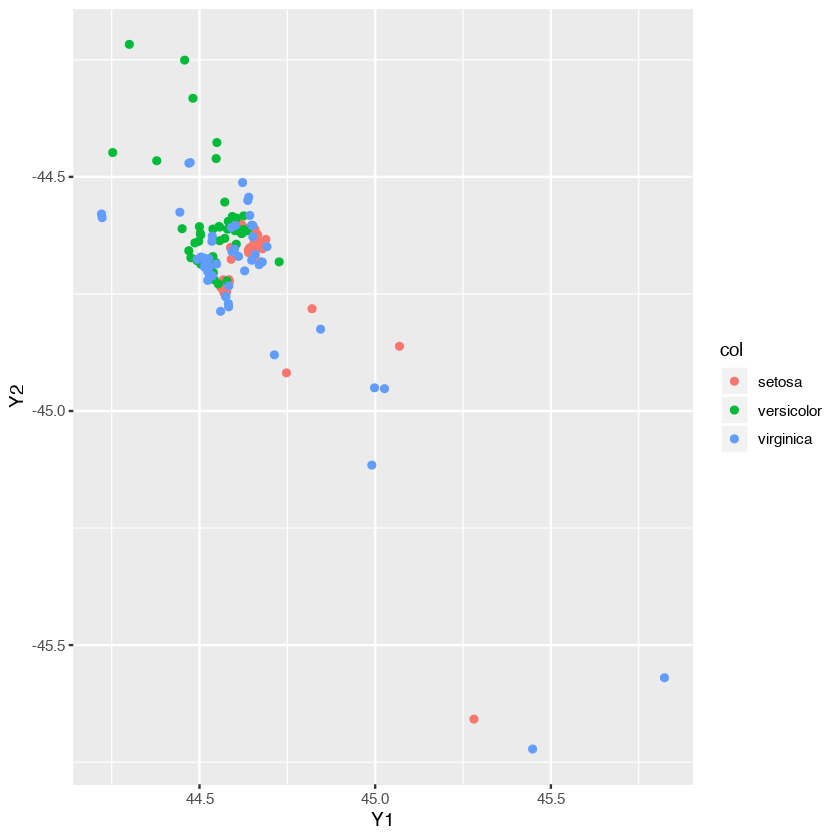

In [135]:
data.frame(Y1=y[,1], Y2=y[,2], col=iris$Species) %>%
    ggplot() +
    geom_point(aes(Y1, Y2, col=col))